In [1]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt


## (Dumb) Experiment: Calculating loss after downsized and upsized image
this was an experiment
result: in this case blur is better than not blurring
but the experiments of the following result show this is not the best solution

In [2]:
def loss(y_true, y_pred):
    lossv =  -y_true*np.log(y_pred + 0.0000001) - (1-y_true) * np.log(np.abs(1-y_pred + 0.000001))
    return np.nan_to_num(lossv)
    
def getSegmentationArr( path , nClasses ,  width , height  ):

	seg_labels = np.zeros((  height , width  , nClasses ))
	try:
		img = cv2.imread(path, 1)
		img = cv2.resize(img, ( width , height ))
		img = img[:, : , 0]

		for c in range(nClasses):
			seg_labels[: , : , c ] = (img == c ).astype(int)

	except Exception as e:
		print(e)
		
	seg_labels = np.reshape(seg_labels, ( width*height , nClasses ))
	return seg_labels


high resolution annotation


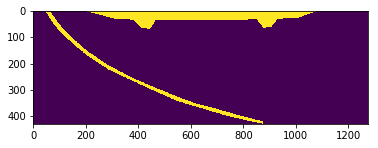

upscaled annotation


blurred annotation


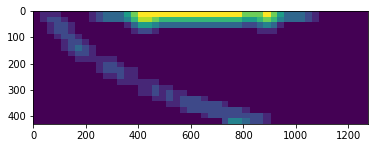

new img_loss 0.09939025470497806
old img_loss 0.45534185054806653


mean of new loss is  0.09871021723856645 , whereas mean of old loss is  0.3762389823403352


In [5]:
os.chdir("/home/otto/git/image-analysis/models_segmentation/datasets_eval/all_validation_sets/testset_v8.3/2019-07-29 13:13:11.539668 roggden cable 2")

current_dir = "./"
files = os.listdir(current_dir)
pngs = [a for a in files if ".png" in a]
jpgs = [a for a in files if ".jpg" in a]
pngs.sort()
jpgs.sort()
losses_old = []
losses_new = []


for i in range(len(jpgs)):
    
    imgorig = cv2.imread(current_dir+ jpgs[i])

    ann_hr = cv2.imread(current_dir + pngs[i])[:,:,0].astype(float)
    ann_hr[ann_hr == 0] = 2
    ann_hr[ann_hr == 1] = 0
    ann_hr[ann_hr == 2] = 1
    
    img1 = getSegmentationArr(current_dir + pngs[i], 2, 48, 20)[:,0]
    img1 = np.reshape(img1, (20, 48))
    input_res_wh = (imgorig.shape[1], imgorig.shape[0])
    img1 = cv2.resize(img1, input_res_wh, interpolation=cv2.INTER_NEAREST)
    

    
    imgb = getSegmentationArr(current_dir + pngs[i], 2, 48, 20)[:,0]
    imgb = np.reshape(imgb, (20, 48))
    kernel = np.ones((3,3),np.float32)/9
    imgb = cv2.filter2D(imgb,-1,kernel)
    imgb = cv2.resize(imgb, input_res_wh, interpolation=cv2.INTER_NEAREST)
    
    new_loss = loss(ann_hr, imgb)
    old_loss = loss(ann_hr, img1)
    if(i==10):
        plt.imshow(imgorig)
        plt.show()
        print("high resolution annotation")
        plt.imshow(ann_hr)
        plt.show()
        print("upscaled annotation")
        plt.imshow(img1)
        plt.show()
        print("blurred annotation")
        plt.imshow(imgb)
        plt.show()
        print("new img_loss", np.mean(new_loss))
        print("old img_loss", np.mean(old_loss))
        plt.imshow(old_loss)
        plt.show()
        plt.imshow(new_loss)
        plt.show()    
    
    if(i==11):
        break
    losses_old.append(old_loss)
    losses_new.append(new_loss)

np.array(losses_old)
np.array(losses_new)

print("mean of new loss is ", np.mean(losses_new), ", whereas mean of old loss is ", np.mean(losses_old))

## downsize annotation with varying interpolation methods

the result is clear: from the available cv2 interplation methods, the inter_area hast a lot lower loss to the original high res annotation

cv2.INTER_AREA


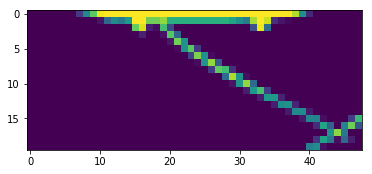

loss was  0.0581610503299776
 cv2.INTER_CUBIC


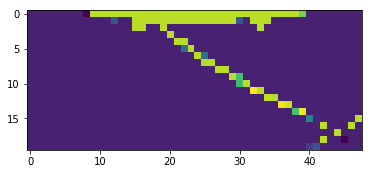

/home/otto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


loss was  0.3039001163341304
 cv2.INTER_LANCZOS4


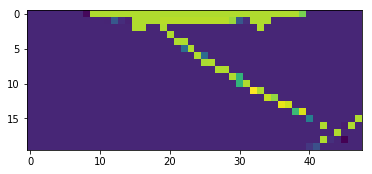

loss was  0.19480107410262815
 cv2.INTER_NEAREST


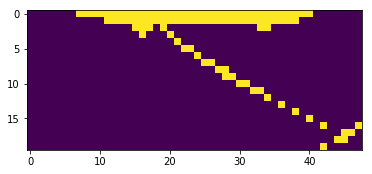

loss was  0.6540634686668092
 cv2.INTER_LINEAR


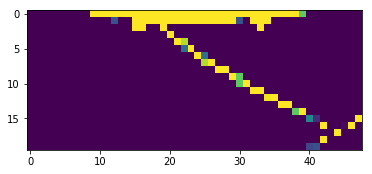

loss was  0.34710036228461805


In [6]:
i = 3
#i is index for image in current dir
ann_hr = cv2.imread(current_dir + pngs[i])[:,:,0].astype(float)
ann_hr[ann_hr == 0] = 2
ann_hr[ann_hr == 1] = 0
ann_hr[ann_hr == 2] = 1

interpolations = [cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4, cv2.INTER_NEAREST, cv2.INTER_LINEAR]
interpolation_strings = "cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4, cv2.INTER_NEAREST, cv2.INTER_LINEAR"
interpolation_strings = interpolation_strings.split(',')
for j in range(len(interpolations)):
    ann_lr = cv2.resize(ann_hr, (48, 20), interpolation=interpolations[j])
    
    print(str(interpolation_strings[j]))
    plt.imshow(ann_lr)
    plt.show()
    
    ann_lr_upscaled = cv2.resize(ann_lr, ann_hr.shape[::-1], interpolation=cv2.INTER_NEAREST)
    loss_img = loss(ann_hr, ann_lr_upscaled)
    #plt.imshow(loss_img)
    #plt.show()
    
    
    print("loss was ", np.mean(loss_img))

## compare downsize and blur to downsize with inter_area interpolation

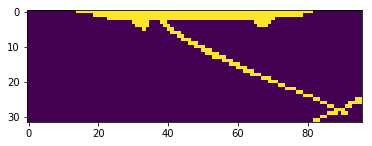

high res


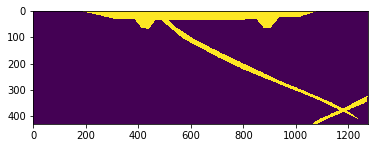

dilated high res


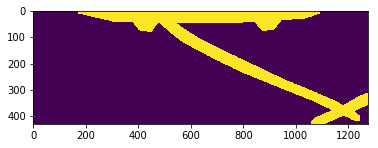

dilated low res


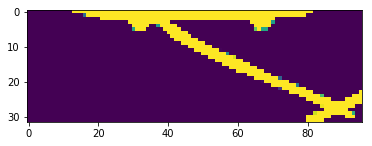

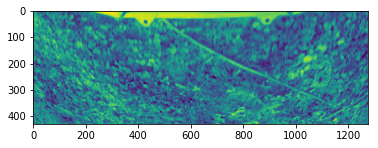

In [8]:
i = 3
#i is index for image in current dir
ann_hr = cv2.imread(current_dir + pngs[i])[:,:,0].astype(float)
img_orig = cv2.imread(current_dir + jpgs[i])[:,:,0].astype(float)
ann_hr[ann_hr == 0] = 2
ann_hr[ann_hr == 1] = 0
ann_hr[ann_hr == 2] = 1

s=2
outputres = (48*s,16*s)


ann_lr = cv2.resize(ann_hr, outputres, interpolation=cv2.INTER_NEAREST)

plt.imshow(ann_lr)
plt.show()




#kernel = np.ones((3,3),np.float32)/9

#ann_lr_blurred = cv2.filter2D(ann_lr,-1,kernel)
#plt.imshow(ann_lr_blurred)
#plt.show()

print("high res")
plt.imshow(ann_hr)
plt.show()

print("dilated high res")
kernel = np.ones((20, 20))
ann_dl = cv2.dilate(ann_hr, kernel)
plt.imshow(ann_dl)
plt.show()

print("dilated low res")
ann_dl_lowres = cv2.resize(ann_dl, outputres)
plt.imshow(ann_dl_lowres)
plt.show()

plt.imshow(img_orig)
plt.show()
